# Fit Varshni dei picchi reference

In [1]:
from picchi import raccoglitore_1 # picchi reference
from varshni_subroutines import *

d_o_emi = ['emi=0', 'emi=0o5', 'emi=1', 'emi=1o5', 'emi=2', 'emi=2o5', 'emi=3']#, '3o5']
d_o_ass = ['ass=0', 'ass=1']
arr_temperatura = [15, 30, 45, 70, 100, 150]

### Estraggo i due picchi e il loro errore

In [2]:
# i picchi vengono raccolti in data
# la key [ass][emi] contiene:
# [0] - lista dei picchi sx
# [1] - lista degli errori sui picchi sx
# [2] - lista dei picchi dx
# [3] - lista degli errori sui picchi dx

data = {}

In [3]:
for ass in d_o_ass:
    
    data[ass] = {}
    
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        
        data[ass][emi] = []
        arr_picchi_sx  = []
        arr_err_picchi_sx  = []
        arr_picchi_dx  = []
        arr_err_picchi_dx  = []
        
        # Ciclo sulla temperatura
        for i in range(len(arr_temperatura)):
            
            if len(raccoglitore_1[ass][emi][i]['Regione 1']) > 0:
                picco_sx = raccoglitore_1[ass][emi][i]['Regione 1'][0][0]
                err_picco_sx = raccoglitore_1[ass][emi][i]['Regione 1'][0][1]
                #print(i)
            else:
                #print('#'+str(i))
                picco_sx, err_picco_sx = 0, 0
                
            if len(raccoglitore_1[ass][emi][i]['Regione 2']) > 0:
                
                picco_dx = raccoglitore_1[ass][emi][i]['Regione 2'][0][0]
                err_picco_dx = raccoglitore_1[ass][emi][i]['Regione 2'][0][1]
            else:
                picco_dx, err_picco_dx = 0, 0
               
            # conversione dei nm in eV degli errori
            err_picco_sx = err_lambda_to_E(picco_sx, err_picco_sx)
            err_picco_dx = err_lambda_to_E(picco_dx, err_picco_dx)
            
            # HACK: PROVO A METTERE ERRORE in nm 299.582/399 = 0,7508320802 nm cioè risoluzione apparato
            # mentre la versione precedente considera gli errori sui picchi forniti dal fitter
            err_picco_sx = err_lambda_to_E(picco_sx, 0.7508320802)
            err_picco_dx = err_lambda_to_E(picco_dx, 0.7508320802)
            
            # conversione dei nm in eV dei picchi
            picco_sx = lambda_to_E(picco_sx)
            picco_dx = lambda_to_E(picco_dx)
            
            # liste provvisorie 
            arr_picchi_sx.append(picco_sx)
            arr_err_picchi_sx.append(err_picco_sx)
            arr_picchi_dx.append(picco_dx)
            arr_err_picchi_dx.append(err_picco_dx)    
            
        # riempimento del contenitore data    
        data[ass][emi].append(arr_picchi_sx)
        data[ass][emi].append(arr_err_picchi_sx)
        data[ass][emi].append(arr_picchi_dx)
        data[ass][emi].append(arr_err_picchi_dx)
                        

## Plot e fit

Per ciascuna key [ass][emi] l'obiettivo è plottare due curve su ciascun grafico, ognuna delle quali è associata a uno dei due picchi. Quidni per ogni intensità si ha 1 grafico con 2 curve, ciascuna fittata con Varshni

In [4]:
arr_e_0_sx, arr_e_0_dx = [], []
arr_err_e_0_sx, arr_err_e_0_dx = [], []

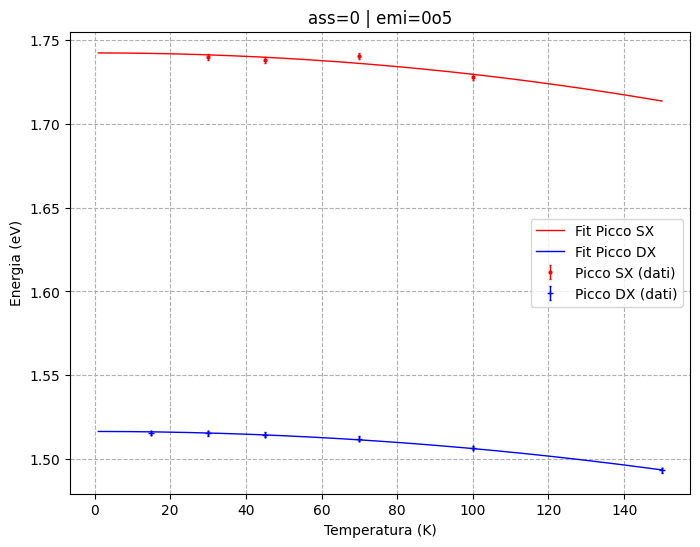

Parametri fit picco SX:
E_0 = 1.7423207767361344 ± 0.0014766849229297168 ; alpha = 7.984198403346975 ± 1.6161413133392273 ; beta = 6256755.0472838115 ± 2.062310678181498e-06
• Chi quadro: 8.174
• Gradi di libertà: 1
• Chi quadro ridotto: 8.174
• p-value: 4.251e-03
Parametri fit picco DX:
E_0 = 1.5164273458785806 ± 0.0007507138234928162 ; alpha = 324.3894952882952 ± 22.779562721854376 ; beta = 317804651.41304487 ± 2.325154230455038e-05
• Chi quadro: 0.657
• Gradi di libertà: 3
• Chi quadro ridotto: 0.219
• p-value: 8.834e-01


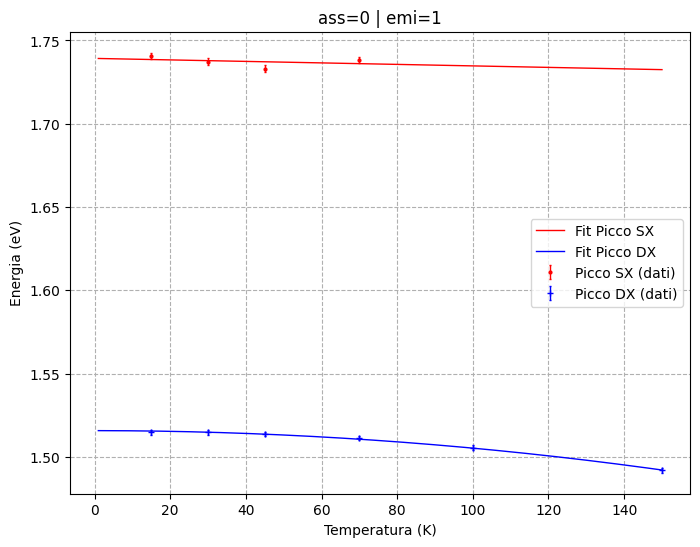

Parametri fit picco SX:
E_0 = 1.739251834074588 ± 4.565763609161453 ; alpha = 4.496938891847564e-05 ± 5.282776236016955e-05 ; beta = 0.0036700311136992113 ± 101583.24723903967
• Chi quadro: 8.216
• Gradi di libertà: 1
• Chi quadro ridotto: 8.216
• p-value: 4.152e-03
Parametri fit picco DX:
E_0 = 1.5157669014696937 ± 0.0007499749687941718 ; alpha = 53.18423523115171 ± 3.622677594257294 ; beta = 50616660.31925422 ± 3.8064253087540245e-06
• Chi quadro: 0.621
• Gradi di libertà: 3
• Chi quadro ridotto: 0.207
• p-value: 8.916e-01


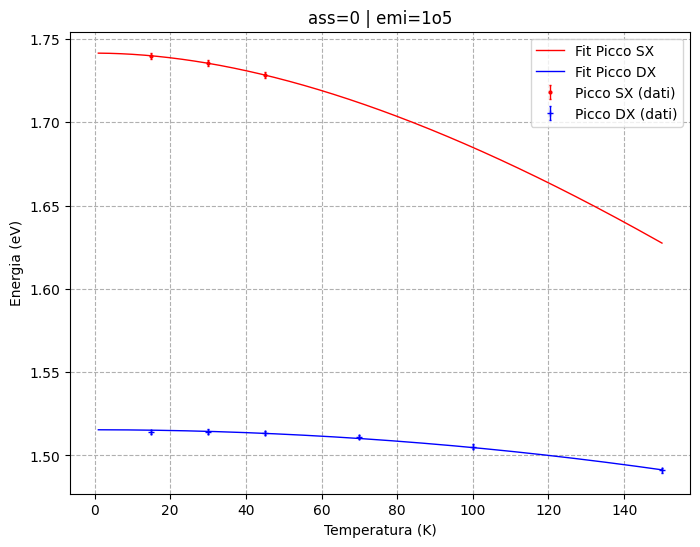

Parametri fit picco SX:
E_0 = 1.7414816517710492 ± 0.003576370899104478 ; alpha = 0.0024271050697389834 ± 0.03176705098657717 ; beta = 328.96422469182124 ± 4964.599895378215
• Chi quadro: 0.000
• Gradi di libertà: 0
• Chi quadro ridotto: nan
• p-value: nan
Parametri fit picco DX:
E_0 = 1.5154195701958144 ± 0.0007495307746578072 ; alpha = 43.59287619337829 ± 2.9175178801781407 ; beta = 40804032.738438055 ± 3.1169108316396308e-06
• Chi quadro: 1.221
• Gradi di libertà: 3
• Chi quadro ridotto: 0.407
• p-value: 7.480e-01


/var/folders/88/gfgbzsfs2m759nlsp4wspv400000gp/T/ipykernel_38105/2142711553.py:84: RuntimeWarning: invalid value encountered in scalar divide
  chi2_ridotto1 = chi2_1 / gdl1


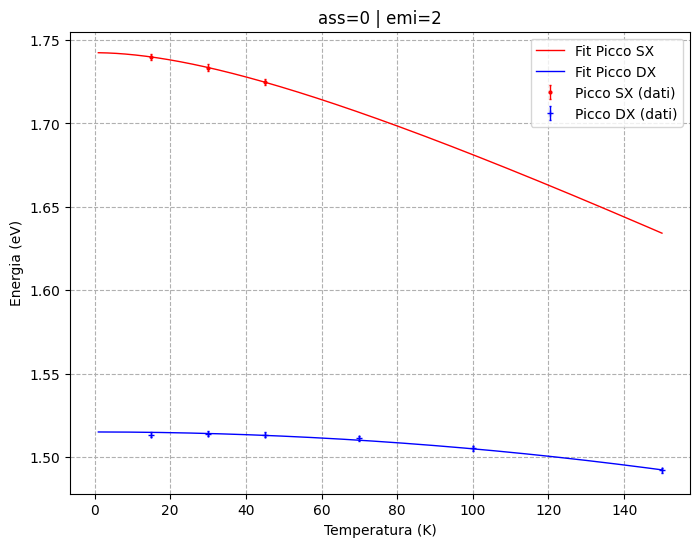

/var/folders/88/gfgbzsfs2m759nlsp4wspv400000gp/T/ipykernel_38105/2142711553.py:84: RuntimeWarning: divide by zero encountered in scalar divide
  chi2_ridotto1 = chi2_1 / gdl1


Parametri fit picco SX:
E_0 = 1.7424206395384454 ± 0.0042250039646606835 ; alpha = 0.0011255873006362817 ± 0.003311522507092029 ; beta = 83.96429558420826 ± 401.6685687996544
• Chi quadro: 0.000
• Gradi di libertà: 0
• Chi quadro ridotto: inf
• p-value: nan
Parametri fit picco DX:
E_0 = 1.5149401946831953 ± 0.0007492339519001427 ; alpha = 38.00663208261184 ± 2.6918936010613432 ; beta = 37625770.09235456 ± 2.7191318660934414e-06
• Chi quadro: 1.767
• Gradi di libertà: 3
• Chi quadro ridotto: 0.589
• p-value: 6.221e-01


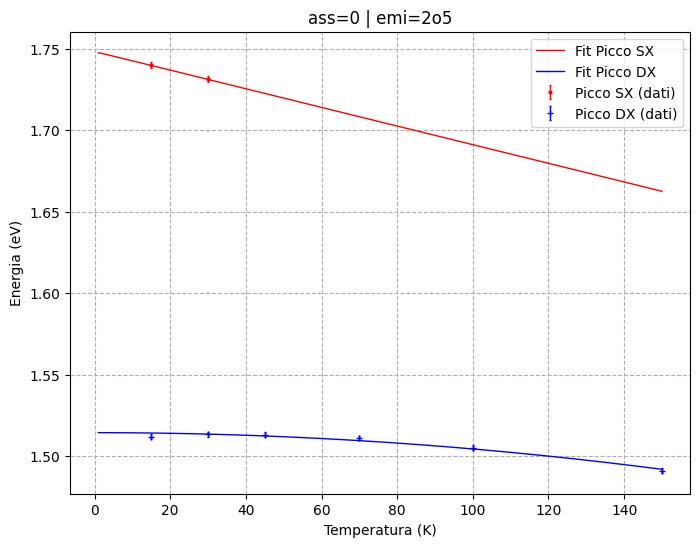

Parametri fit picco SX:
E_0 = 1.7479570725163864 ± 0.003964346879045358 ; alpha = 0.0005723186837959334 ± 0.0001722290120438603 ; beta = 0.8422586689895379 ± 1.9268865897443155e-06
• Chi quadro: 0.000
• Gradi di libertà: -1
• Chi quadro ridotto: -0.000
• p-value: nan
Parametri fit picco DX:
E_0 = 1.5144376760298055 ± 0.0007486205155170032 ; alpha = 233.09377806713024 ± 16.649740766880186 ; beta = 232935493.06513017 ± 1.6661036528791302e-05
• Chi quadro: 5.134
• Gradi di libertà: 3
• Chi quadro ridotto: 1.711
• p-value: 1.623e-01


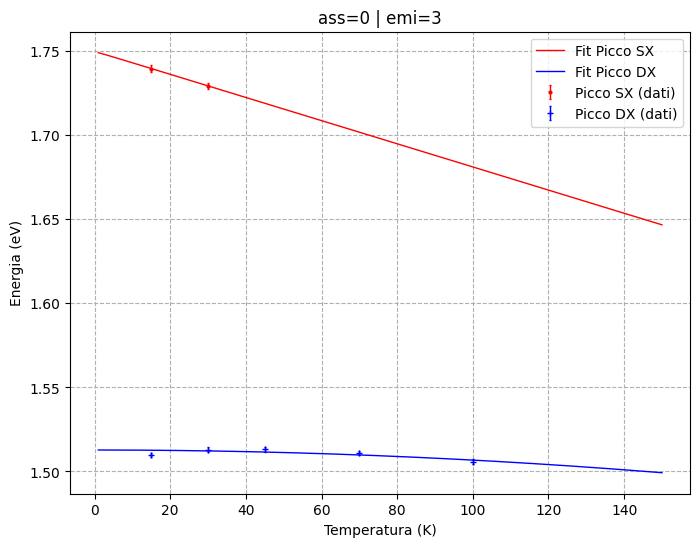

Parametri fit picco SX:
E_0 = 1.7494949202207881 ± 0.003961141008587988 ; alpha = 0.0006890922781589976 ± 0.00017203890499797438 ; beta = 0.8507444122530379 ± 2.314494472973984e-06
• Chi quadro: 0.000
• Gradi di libertà: -1
• Chi quadro ridotto: -0.000
• p-value: nan
Parametri fit picco DX:
E_0 = 1.512748828274361 ± 0.0010227097744717204 ; alpha = 2.4950811702828397 ± 147860.43263877052 ; beta = 4151944.8316843333 ± 246053185878.5306
• Chi quadro: 7.016
• Gradi di libertà: 2
• Chi quadro ridotto: 3.508
• p-value: 2.996e-02


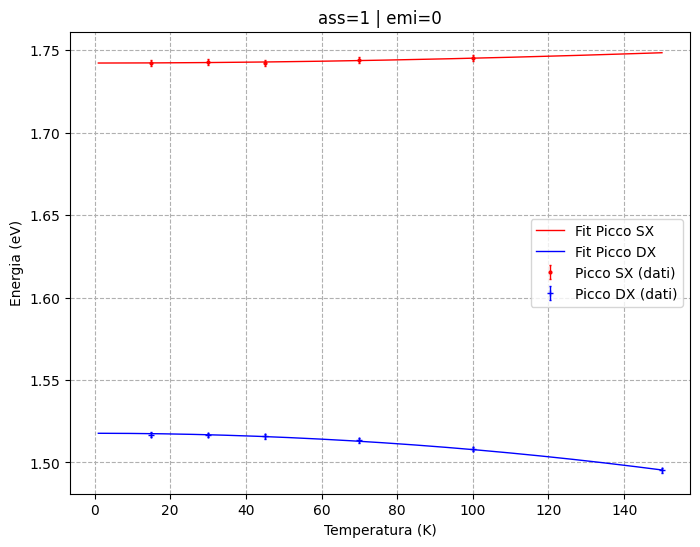

Parametri fit picco SX:
E_0 = 1.74218837606943 ± 0.0017579599105725728 ; alpha = -0.00026967274461759473 ± 0.01207207859479658 ; beta = 821.0927719159472 ± 41408.436348660325
• Chi quadro: 0.159
• Gradi di libertà: 2
• Chi quadro ridotto: 0.079
• p-value: 9.238e-01
Parametri fit picco DX:
E_0 = 1.5176884349018007 ± 0.000752064353819065 ; alpha = 320.73792180817475 ± 23.299840078148073 ; beta = 324296599.5826665 ± 2.30441398919696e-05
• Chi quadro: 0.578
• Gradi di libertà: 3
• Chi quadro ridotto: 0.193
• p-value: 9.014e-01


In [5]:
for ass in d_o_ass:
    
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        
        # in ascissa va la temperatura
        x1 = arr_temperatura
        x2 = arr_temperatura
        
        # picco sx
        y1 = data[ass][emi][0]
        err_y1 = data[ass][emi][1]
        
        # picco dx
        y2 = data[ass][emi][2]
        err_y2 = data[ass][emi][3]
        
        # vanno eliminati i punti con ordinata 0 (non è stato individuato il picco)
        x1 = [x_val for x_val, y_val in zip(x1, y1) if y_val != 0]
        y1 = [y_val for y_val in y1 if y_val != 0]
        err_y1 = [e_y_val for e_y_val in err_y1 if e_y_val != 0]
        
        x2 = [x_val for x_val, y_val in zip(x2, y2) if y_val != 0]
        y2 = [y_val for y_val in y2 if y_val != 0]
        err_y2 = [e_y_val for e_y_val in err_y2 if e_y_val != 0]
        
        err_x = 1 # errore di 1 K sulla temperatura
        
        # Fit del primo picco - Parametri iniziali?
        popt1, pcov1 = curve_fit(varshni, x1, y1, sigma=err_y1, absolute_sigma=True, p0=[x1[0], 3, 1], 
                     bounds=([0, -np.inf, 0], [np.inf, np.inf, np.inf]))
        
        # Fit del secondo picco
        popt2, pcov2 = curve_fit(varshni, x2, y2, sigma=err_y2, absolute_sigma=True, p0=[x2[0], 3, 1], 
                     bounds=([0, -np.inf, 0], [np.inf, np.inf, np.inf]))
        
        # Errori sui parametri
        perr1 = np.sqrt(np.diag(pcov1))  # Errori per il primo picco
        perr2 = np.sqrt(np.diag(pcov2))  # Errori per il secondo picco

        
        # Creazione del grafico
        x_fit = np.linspace(1, 150, 500)  # Creazione di un intervallo continuo per il grafico

        plt.figure(figsize=(8, 6))
        
        # Plot del primo picco e del suo fit
        plt.errorbar(x1, y1, yerr=err_y1, fmt='ro', label='Picco SX (dati)', markersize=2, elinewidth=1, capsize=1)
        plt.plot(x_fit, varshni(x_fit, *popt1), 'r-', linewidth=1, label='Fit Picco SX')

        # Plot del secondo picco e del suo fit
        plt.errorbar(x2, y2, yerr=err_y2, fmt='b+', label='Picco DX (dati)', markersize=4, elinewidth=1, capsize=1)
        plt.plot(x_fit, varshni(x_fit, *popt2), 'b-', linewidth=1, label='Fit Picco DX')

        # Aggiungere etichette e legenda
        # HACK: ho invertito emi e ass, li inverto e poi li ri-inverto
        help = emi
        emi = ass
        ass = help
        
        plt.title(emi + ' | ' + ass)
        plt.xlabel('Temperatura (K)')
        plt.ylabel('Energia (eV)')
        plt.grid(linestyle='--')
        plt.legend()
        
        ass = emi
        emi = help
        
        # Mostrare il grafico
        plt.show()
        
        # Analisi fit
        ## Residui del picco SX
        residui1 = y1 - varshni(x1, *popt1)
        chi2_1 = np.sum((residui1 / err_y1) ** 2)

        # Gradi di libertà (numero dati - numero parametri del fit)
        gdl1 = len(y1) - len(popt1)

        # Chi quadro ridotto
        chi2_ridotto1 = chi2_1 / gdl1
        
        # valore p
        p_value1 = 1 - chi2.cdf(chi2_1, gdl1)
        
        ## Residui del picco DX
        residui2 = y2 - varshni(x2, *popt2)
        chi2_2 = np.sum((residui2 / err_y2) ** 2)

        # Gradi di libertà (numero dati - numero parametri del fit)
        gdl2 = len(y2) - len(popt2)

        # Chi quadro ridotto
        chi2_ridotto2 = chi2_2 / gdl2
        
        # valore p
        p_value2 = 1 - chi2.cdf(chi2_2, gdl2)
        
        # Stampa dei risultati
        print("Parametri fit picco SX:")
        print("E_0 =", popt1[0], '±', perr1[0], "; alpha =", popt1[1], '±', perr1[1], "; beta =", popt1[2], '±', perr1[2])
        print(f"• Chi quadro: {chi2_1:.3f}")
        print(f"• Gradi di libertà: {gdl1}")
        print(f"• Chi quadro ridotto: {chi2_ridotto1:.3f}")
        print(f"• p-value: {p_value1:.3e}")       
        print("Parametri fit picco DX:")
        print("E_0 =", popt2[0], '±', perr2[0], "; alpha =", popt2[1], '±', perr2[1], "; beta =", popt2[2], '±', perr2[2])
        print(f"• Chi quadro: {chi2_2:.3f}")
        print(f"• Gradi di libertà: {gdl2}")
        print(f"• Chi quadro ridotto: {chi2_ridotto2:.3f}")
        print(f"• p-value: {p_value2:.3e}")  
        
        arr_e_0_sx.append(popt1[0])
        arr_e_0_dx.append(popt2[0])
        arr_err_e_0_sx.append(perr1[0])
        arr_err_e_0_dx.append(perr2[0])

### Stampa E_0

In [6]:
np.set_printoptions(legacy='1.25')

#### E_0 ricavati da Picco SX

In [7]:
arr_e_0_sx

[1.7423207767361344,
 1.739251834074588,
 1.7414816517710492,
 1.7424206395384454,
 1.7479570725163864,
 1.7494949202207881,
 1.74218837606943]

#### Errori E_0 SX

In [8]:
arr_err_e_0_sx

[0.0014766849229297168,
 4.565763609161453,
 0.003576370899104478,
 0.0042250039646606835,
 0.003964346879045358,
 0.003961141008587988,
 0.0017579599105725728]

#### E_0 ricavati da Picco DX

In [9]:
arr_e_0_dx

[1.5164273458785806,
 1.5157669014696937,
 1.5154195701958144,
 1.5149401946831953,
 1.5144376760298055,
 1.512748828274361,
 1.5176884349018007]

#### Errori E_0 DX

In [10]:
arr_err_e_0_dx

[0.0007507138234928162,
 0.0007499749687941718,
 0.0007495307746578072,
 0.0007492339519001427,
 0.0007486205155170032,
 0.0010227097744717204,
 0.000752064353819065]

Provo a calcolare il chi-quadro di questi valori; il residuo sarà la distanza dalla media pesata. N-1 gradi di libertà. (N=6)

In [11]:
# media pesata
m_p_sx = media_pesata(arr_e_0_sx, arr_err_e_0_sx)
err_m_p_sx = np.sqrt(1 / np.sum(1 / np.array(arr_err_e_0_sx)**2))
m_p_dx = media_pesata(arr_e_0_dx, arr_err_e_0_dx)
err_m_p_dx = np.sqrt(1 / np.sum(1 / np.array(arr_err_e_0_dx)**2))
print('medie pesate: sx=', m_p_sx, '| dx=', m_p_dx)

# la media pesata non è un valore esatto
# Errore totale considerando anche l'errore sulla media
sigma_tot_sx = np.sqrt(np.array(arr_err_e_0_sx)**2 + err_m_p_sx**2)
sigma_tot_dx = np.sqrt(np.array(arr_err_e_0_dx)**2 + err_m_p_dx**2)

# residui
residui_sx = arr_e_0_sx - m_p_sx
chi2_sx = np.sum( (residui_sx / sigma_tot_sx) ** 2)
residui_dx = arr_e_0_dx - m_p_dx
chi2_dx = np.sum( (residui_dx / sigma_tot_sx) ** 2)

# chi quadro ridotti
chi2_rid_sx = chi2_sx / (len(arr_e_0_sx)-1)
chi2_rid_dx = chi2_dx / (len(arr_e_0_dx)-1)

medie pesate: sx= 1.7430039038232836 | dx= 1.5155277854111089


In [12]:
print('chi2 ridotto SX =', chi2_rid_sx)
print('chi2 ridotto DX =', chi2_rid_dx)

chi2 ridotto SX = 0.7502809171858903
chi2 ridotto DX = 0.32754383274501786
